# Classic Models

In [1]:
import os
os.environ["DATA_DIR"] = "./data_files"

In [14]:
# Data read in
from commentary2ratings.data.commentary_and_ratings.src.commentary_rating_data_loader import CommentaryAndRatings
from torch.utils.data import DataLoader

NORMALIZATION = False
MIN_COMMENTS = 1

# Bert Data
bert_data_train = CommentaryAndRatings(processed_dataset_path='processed_data_bert.h5', mode='train', normalize=NORMALIZATION, min_comments=MIN_COMMENTS)
bert_data_test = CommentaryAndRatings(processed_dataset_path='processed_data_bert.h5', mode='test', normalize=NORMALIZATION, min_comments=MIN_COMMENTS)

bert_loader_train = DataLoader(bert_data_train, batch_size=bert_data_train.__len__(), shuffle=True)
bert_loader_test = DataLoader(bert_data_test, batch_size=bert_data_test.__len__(), shuffle=True)

# XLNet Data
xlnet_data_train = CommentaryAndRatings(processed_dataset_path='processed_data_xlnet.h5', mode='train', normalize=NORMALIZATION, min_comments=MIN_COMMENTS)
xlnet_data_test = CommentaryAndRatings(processed_dataset_path='processed_data_xlnet.h5', mode='test', normalize=NORMALIZATION, min_comments=MIN_COMMENTS)

xlnet_loader_train = DataLoader(xlnet_data_train, batch_size=xlnet_data_train.__len__(), shuffle=True)
xlnet_loader_test = DataLoader(xlnet_data_test, batch_size=xlnet_data_test.__len__(), shuffle=True)

for batch in bert_loader_train:
    for k in batch:
        print(k, batch[k].shape)

for batch in xlnet_loader_train:
    for k in batch:
        print(k, batch[k].shape)

commentary_len torch.Size([6768])
padded_commentary_embedding torch.Size([6768, 27, 768])
player torch.Size([6768, 452])
player_stats torch.Size([6768, 46])
rating torch.Size([6768])
commentary_len torch.Size([6768])
padded_commentary_embedding torch.Size([6768, 27, 768])
player torch.Size([6768, 452])
player_stats torch.Size([6768, 46])
rating torch.Size([6768])


In [15]:
import torch

def train(model, data_loader):
    for batch in data_loader:
        flattened_comments = torch.flatten(batch['padded_commentary_embedding'], start_dim=1, end_dim=2)
        labels = batch['rating']
        model.fit(flattened_comments, labels)

    return model

def score(model, data_loader):
    for batch in data_loader:
        print(model.score(torch.flatten(batch['padded_commentary_embedding'], start_dim=1, end_dim=2), batch['rating']))

In [18]:
import matplotlib.pyplot as plt

def plotCorrelation(model, data_loader, data_object):
    for batch in data_loader:
        pred_ratings = model.predict(torch.flatten(batch['padded_commentary_embedding'], start_dim=1, end_dim=2))
        true_ratings = batch['rating']

    if data_object.normalize:
        pred_ratings = pred_ratings*data_object.norm_mean + data_object.norm_stddev
        true_ratings = true_ratings*data_object.norm_mean + data_object.norm_stddev

    plt.figure()
    plt.scatter(true_ratings, pred_ratings)
    plt.xlabel('true ratings')
    plt.ylabel('predicted ratings')
    plt.plot((4,9), (4,9), 'r--')
    plt.show()

def runTestAndPlot(model, data_loader_train, data_loader_test, dataobject_test, name=""):
    model = train(model, data_loader_train)
    print(name)
    score(model, data_loader_test)
    plotCorrelation(model, data_loader_test, dataobject_test)

Ridge Regression Model, Bert: 
-0.20705683242264405


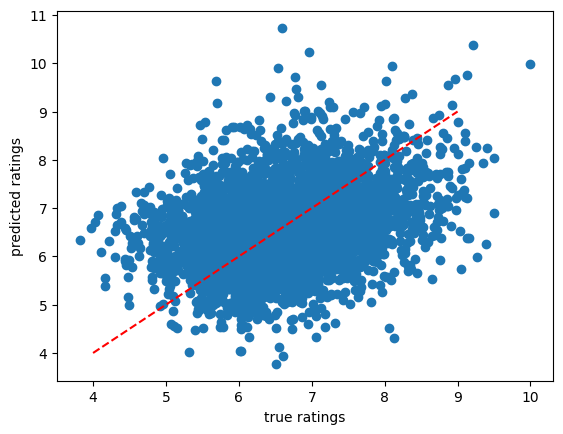

Ridge Regression Model, XLNet: 
-0.6199449576827274


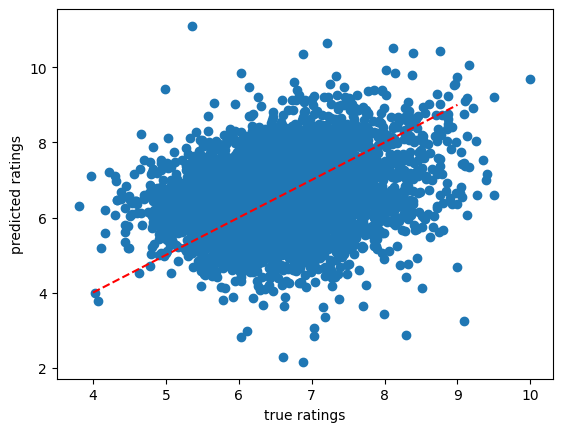

In [20]:
from sklearn import linear_model

ridge_model_bert = linear_model.Ridge()
ridge_model_xlnet = linear_model.Ridge()

title = "Ridge Regression Model, Bert: "
runTestAndPlot(ridge_model_bert, bert_loader_train, bert_loader_test, bert_data_test, title)

title = "Ridge Regression Model, XLNet: "
runTestAndPlot(ridge_model_xlnet, xlnet_loader_train, xlnet_loader_test, xlnet_data_test, title)

ElasticNet Model, Bert: 
-7.925541714803863e-05


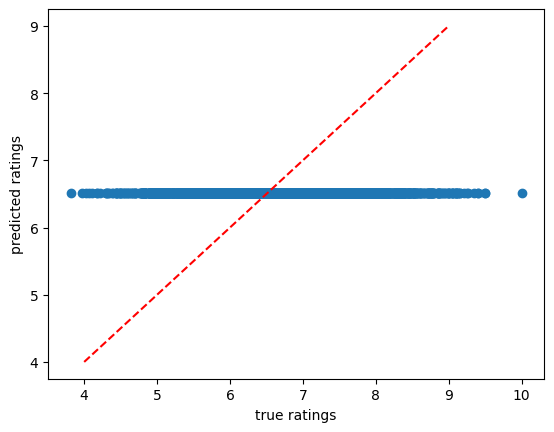

ElasticNet Model, XLNet: 
0.1395534266263475


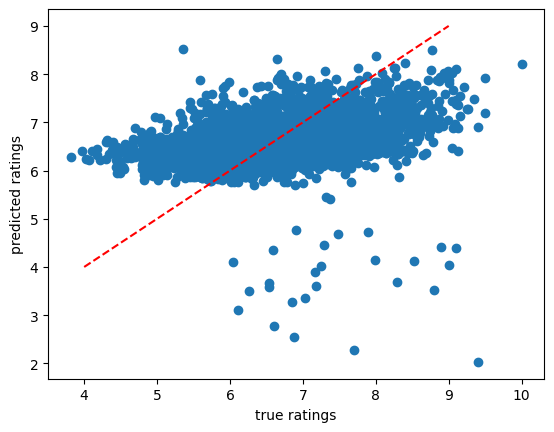

In [21]:
elastic_model_bert = linear_model.ElasticNet()
elastic_model_xlnet = linear_model.ElasticNet()

title = "ElasticNet Model, Bert: "
runTestAndPlot(elastic_model_bert, bert_loader_train, bert_loader_test, bert_data_test, title)

title = "ElasticNet Model, XLNet: "
runTestAndPlot(elastic_model_xlnet, xlnet_loader_train, xlnet_loader_test, xlnet_data_test, title)

Lasso Model, Bert: 
-7.925541714803863e-05


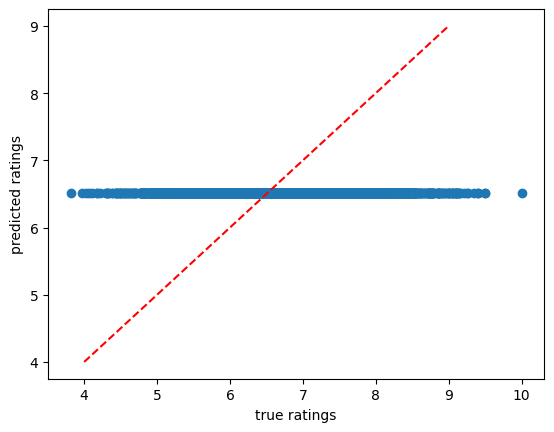

Lasso Model, XLNet: 
0.1616735561407029


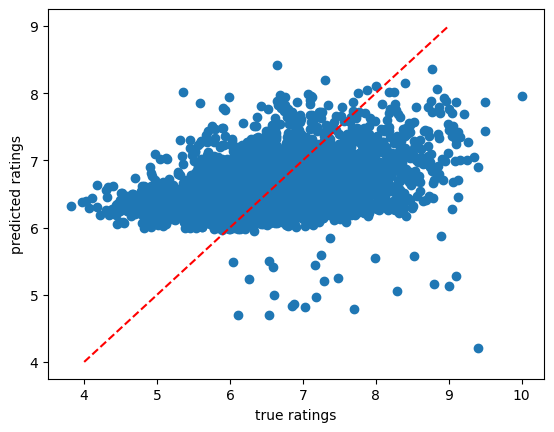

In [22]:
lasso_model_bert = linear_model.Lasso()
lasso_model_xlnet = linear_model.Lasso()

title = "Lasso Model, Bert: "
runTestAndPlot(lasso_model_bert, bert_loader_train, bert_loader_test, bert_data_test, title)

title = "Lasso Model, XLNet: "
runTestAndPlot(lasso_model_xlnet, xlnet_loader_train, xlnet_loader_test, xlnet_data_test, title)

SVR Model, Bert: 
0.12496102790762365


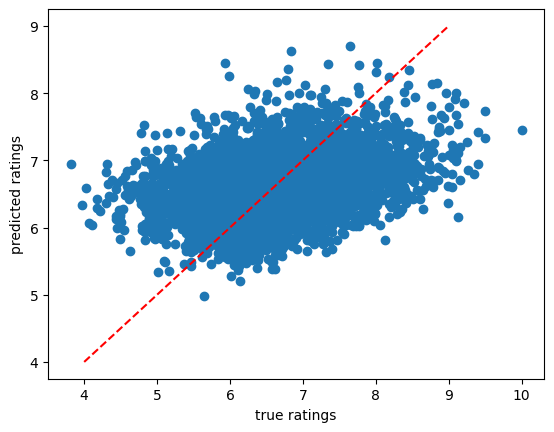

SVR Model, XLNet: 
0.1678478329132581


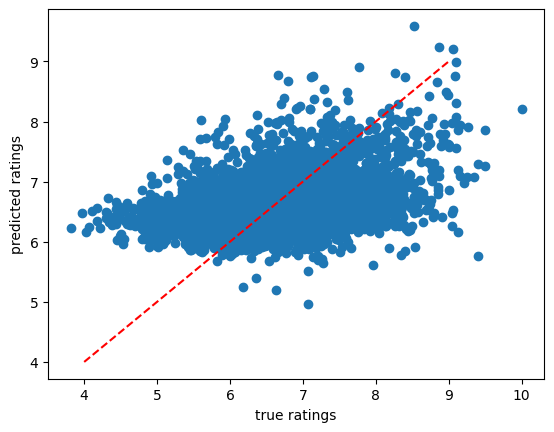

In [24]:
from sklearn import svm

svm_model_bert = svm.SVR(C=10)
svm_model_xlnet = svm.SVR(C=10)

title = "SVR Model, Bert: "
runTestAndPlot(svm_model_bert, bert_loader_train, bert_loader_test, bert_data_test, title)

title = "SVR Model, XLNet: "
runTestAndPlot(svm_model_xlnet, xlnet_loader_train, xlnet_loader_test, xlnet_data_test, title)